In [2]:
#importing needed libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score

import warnings
warnings.filterwarnings(action="ignore")

In [21]:
#Task 1 Loading the dataset, checking for missing values in each CSV file, and imputing the null values appropriately.
#Also, identifying and handling duplicate records.

#Reading all files

aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
order_products_train = pd.read_csv('order_products__train.csv')

In [22]:
#viewing first 5
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [23]:
#checking for any null values in the data
orders.isnull().sum()

,0
order_id,0
user_id,0
eval_set,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,206209


In [24]:
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0)

In [25]:
orders.isnull().sum()

,0
order_id,0
user_id,0
eval_set,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0


In [26]:
print(orders)

         order_id  user_id eval_set  order_number  order_dow  \
0         2539329        1    prior             1          2   
1         2398795        1    prior             2          3   
2          473747        1    prior             3          3   
3         2254736        1    prior             4          4   
4          431534        1    prior             5          4   
...           ...      ...      ...           ...        ...   
3421078   2266710   206209    prior            10          5   
3421079   1854736   206209    prior            11          4   
3421080    626363   206209    prior            12          1   
3421081   2977660   206209    prior            13          1   
3421082    272231   206209    train            14          6   

         order_hour_of_day  days_since_prior_order  
0                        8                     0.0  
1                        7                    15.0  
2                       12                    21.0  
3                  

In [27]:
orders.duplicated().sum()

np.int64(0)

In [28]:
aisles.isnull().sum()

,0
aisle_id,0
aisle,0


In [29]:
aisles.duplicated().sum()

np.int64(0)

In [30]:
products.duplicated().sum()

np.int64(0)

In [31]:
products.isnull().sum()

,0
product_id,0
product_name,0
aisle_id,0
department_id,0


In [32]:
departments.isnull().sum()

,0
department_id,0
department,0


In [33]:
departments.duplicated().sum()

np.int64(0)

In [34]:
order_products_prior.isnull().sum()

,0
order_id,0
product_id,0
add_to_cart_order,0
reordered,0


In [35]:
order_products_prior.duplicated().sum()

np.int64(0)

In [36]:
order_products_train.isnull().sum()

,0
order_id,0
product_id,0
add_to_cart_order,0
reordered,0


In [37]:
order_products_train.duplicated().sum()

np.int64(0)

In [38]:
#now we want to get the total no. of products in each department
#since product_id, department_id, & aisle_id are all in the same file, we'll easily be able to get their counts
#so we'll group by department id & use product id to get the count

product_count_in_department = products.groupby('department_id')['product_id'].count().reset_index()
product_count_in_department.columns = ['department_id', 'product_count']
print(product_count_in_department)

    department_id  product_count
0               1           4007
1               2            548
2               3           1516
3               4           1684
4               5           1054
5               6           1139
6               7           4365
7               8            972
8               9           1858
9              10             38
10             11           6563
11             12            907
12             13           5371
13             14           1115
14             15           2092
15             16           3449
16             17           3085
17             18           1081
18             19           6264
19             20           1322
20             21           1258


In [39]:
aisles_count_in_department = products.groupby('department_id')['aisle_id'].nunique().reset_index()
aisles_count_in_department.columns = ['department_id', 'aisle_count']
print(aisles_count_in_department)

    department_id  aisle_count
0               1           11
1               2            1
2               3            5
3               4            5
4               5            5
5               6            4
6               7            8
7               8            2
8               9            5
9              10            2
10             11           17
11             12            7
12             13           12
13             14            4
14             15            5
15             16           10
16             17           10
17             18            4
18             19           11
19             20            5
20             21            1


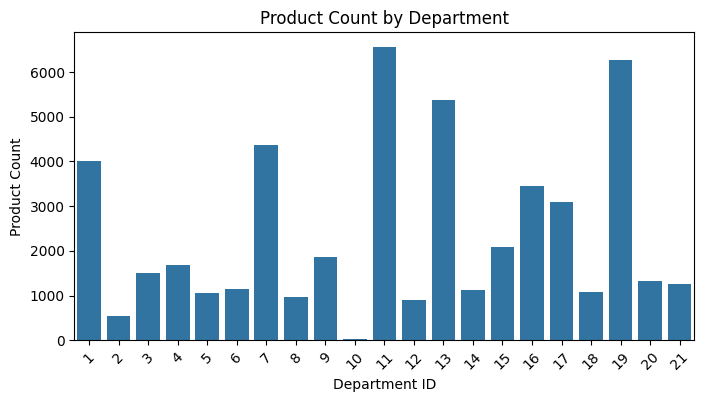

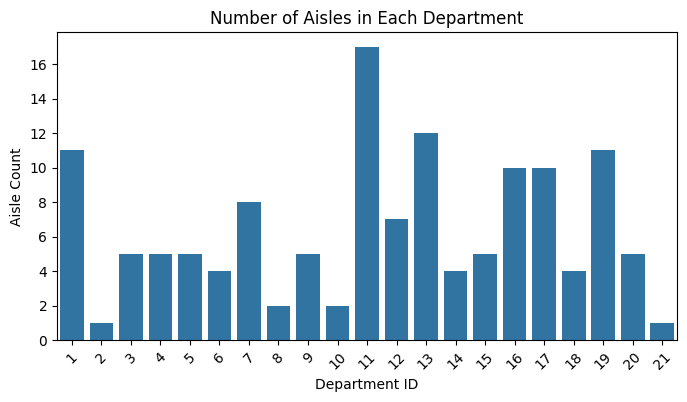

In [40]:
#Exploratory Data Analysis

#product count by department bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x='department_id', y='product_count', data=product_count_in_department)
plt.title('Product Count by Department')
plt.xlabel('Department ID')
plt.ylabel('Product Count')
plt.xticks(rotation=45)
plt.show()

#aisle count in each department bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x='department_id', y='aisle_count', data=aisles_count_in_department)
plt.title('Number of Aisles in Each Department')
plt.xlabel('Department ID')
plt.ylabel('Aisle Count')
plt.xticks(rotation=45)
plt.show()

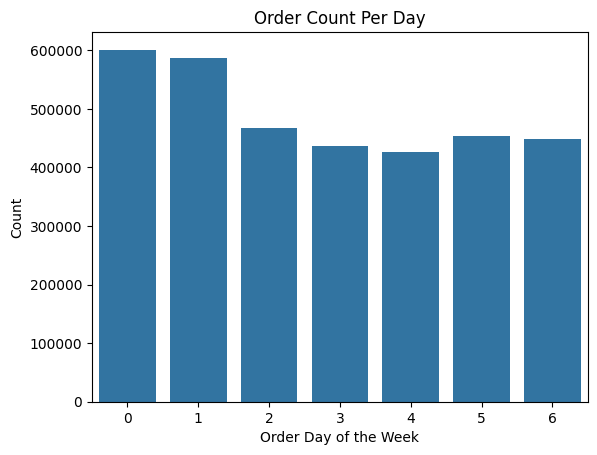

In [41]:
# Plotting a bar chart to show the relationship between the day of the week & total no. of orders

sns.countplot(x = 'order_dow', data = orders)
plt.xlabel('Order Day of the Week')
plt.ylabel('Count')
plt.title("Order Count Per Day")
plt.show()

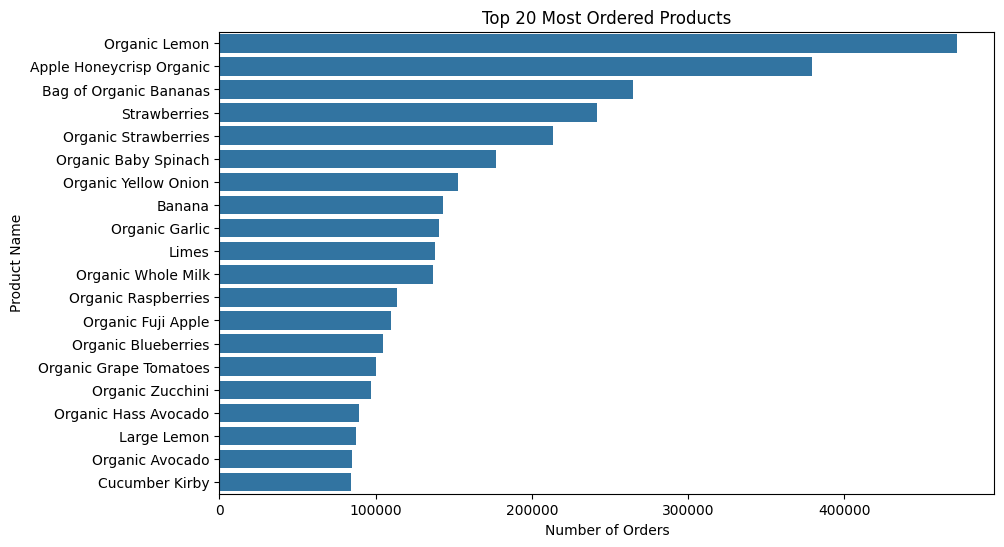

In [42]:
#most frequently ordered products

product_counts = order_products_prior['product_id'].value_counts().head(20)
top_products = products[products['product_id'].isin(product_counts.index)]

plt.figure(figsize=(10, 6))
sns.barplot(x=product_counts.values, y=top_products['product_name'])
plt.title('Top 20 Most Ordered Products')
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.show()

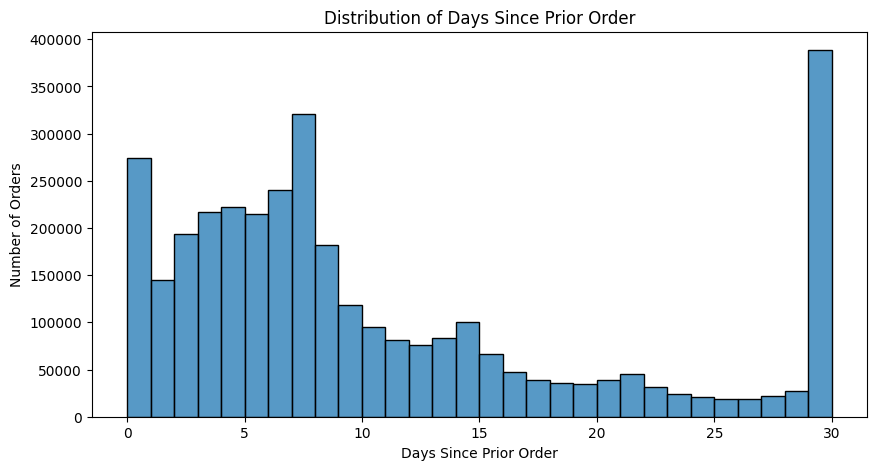

In [43]:
#Days Since Prior Order Distribution

plt.figure(figsize=(10, 5))
sns.histplot(orders['days_since_prior_order'].dropna(), bins=30)
plt.title('Distribution of Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Number of Orders')
plt.show()

In [44]:
#Merging all CSV Files into one

merged_df = order_products_prior.merge(products, on='product_id', how='left')
merged_df = merged_df.merge(aisles, on='aisle_id', how='left')
merged_df = merged_df.merge(departments, on='department_id', how='left')
merged_df = merged_df.merge(orders, on='order_id', how='left')

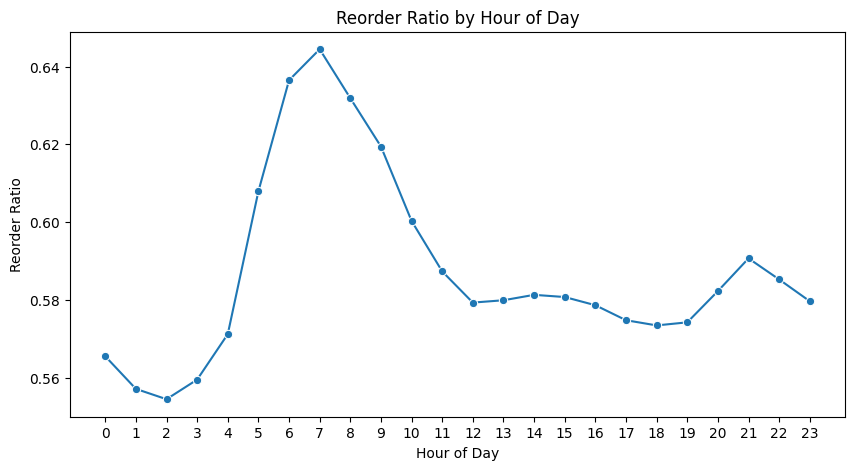

In [46]:
#EDA after merging files

#Reorder Behavior by Hour of Day

hourly_reorder_ratio = merged_df.groupby('order_hour_of_day')['reordered'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_reorder_ratio.index, y=hourly_reorder_ratio.values, marker='o')
plt.title('Reorder Ratio by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Reorder Ratio')
plt.xticks(range(0, 24))
plt.show()

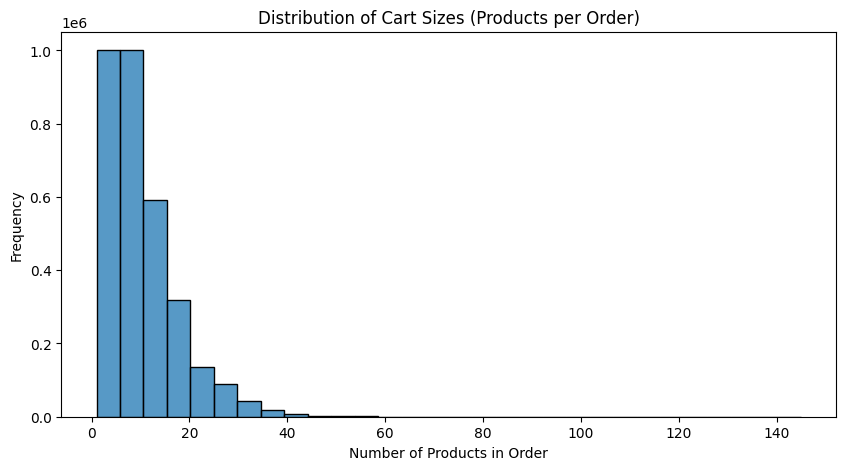

In [47]:
#Average cart size per customer

user_cart_size = merged_df.groupby('order_id')['product_id'].count()

plt.figure(figsize=(10, 5))
sns.histplot(user_cart_size, bins=30)
plt.title('Distribution of Cart Sizes (Products per Order)')
plt.xlabel('Number of Products in Order')
plt.ylabel('Frequency')
plt.show()

In [55]:
#Extracting new features related to consumer purchasing behavior

# 1. Total orders per user
user_total_orders = merged_df.groupby('user_id')['order_number'].max().reset_index()
user_total_orders.columns = ['user_id', 'user_total_orders']

# 2. Total products ordered by user
user_total_products = merged_df.groupby('user_id')['product_id'].count().reset_index()
user_total_products.columns = ['user_id', 'user_total_products']

# 3. Reorder ratio per user
user_reorder_ratio = merged_df.groupby('user_id')['reordered'].mean().reset_index()
user_reorder_ratio.columns = ['user_id', 'user_reorder_ratio']

In [56]:
# 1. Total times a product was ordered
product_total_orders = merged_df.groupby('product_id')['order_id'].count().reset_index()
product_total_orders.columns = ['product_id', 'product_total_orders']

# 2. Reorder ratio of product
product_reorder_ratio = merged_df.groupby('product_id')['reordered'].mean().reset_index()
product_reorder_ratio.columns = ['product_id', 'product_reorder_ratio']

# 3. Average add-to-cart position
product_avg_position = merged_df.groupby('product_id')['add_to_cart_order'].mean().reset_index()
product_avg_position.columns = ['product_id', 'product_avg_cart_position']

In [57]:
# Get train users only
train_orders = orders[orders['eval_set'] == 'train']
train_df = train_orders.merge(order_products_train, on='order_id', how='left')

# Add user-level features
train_df = train_df.merge(user_total_orders, on='user_id', how='left')
train_df = train_df.merge(user_total_products, on='user_id', how='left')
train_df = train_df.merge(user_reorder_ratio, on='user_id', how='left')

# Add product-level features
train_df = train_df.merge(product_total_orders, on='product_id', how='left')
train_df = train_df.merge(product_reorder_ratio, on='product_id', how='left')
train_df = train_df.merge(product_avg_position, on='product_id', how='left')

train_df = train_df.merge(products[['product_id', 'aisle_id', 'department_id']], on='product_id', how='left')
train_df = train_df.merge(aisles, on='aisle_id', how='left')
train_df = train_df.merge(departments, on='department_id', how='left')

In [58]:
train_df.isnull().sum()

,0
order_id,0
user_id,0
eval_set,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0
product_id,0
add_to_cart_order,0
reordered,0


In [59]:
train_df['product_total_orders'] = train_df['product_total_orders'].fillna(0)
train_df['product_reorder_ratio'] = train_df['product_reorder_ratio'].fillna(0)
train_df['product_avg_cart_position'] = train_df['product_avg_cart_position'].fillna(0)

In [60]:
train_df.isnull().sum()

,0
order_id,0
user_id,0
eval_set,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0
product_id,0
add_to_cart_order,0
reordered,0


In [61]:
train_df.duplicated().sum()

np.int64(0)

In [62]:
print(train_df.columns)

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'user_total_orders',
       'user_total_products', 'user_reorder_ratio', 'product_total_orders',
       'product_reorder_ratio', 'product_avg_cart_position', 'aisle_id',
       'department_id', 'aisle', 'department'],
      dtype='object')


In [63]:
train_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,user_total_orders,user_total_products,user_reorder_ratio,product_total_orders,product_reorder_ratio,product_avg_cart_position,aisle_id,department_id,aisle,department
0,1187899,1,train,11,4,8,14.0,196,1,1,10,59,0.694915,35791.0,0.776480,3.721774,77,7,soft drinks,beverages
1,1187899,1,train,11,4,8,14.0,25133,2,1,10,59,0.694915,6196.0,0.740155,7.001614,21,16,packaged cheese,dairy eggs
2,1187899,1,train,11,4,8,14.0,38928,3,1,10,59,0.694915,13238.0,0.827769,3.487309,120,16,yogurt,dairy eggs
3,1187899,1,train,11,4,8,14.0,26405,4,1,10,59,0.694915,1214.0,0.441516,3.116969,54,17,paper goods,household
4,1187899,1,train,11,4,8,14.0,39657,5,1,10,59,0.694915,5019.0,0.766288,4.081490,45,19,candy chocolate,snacks


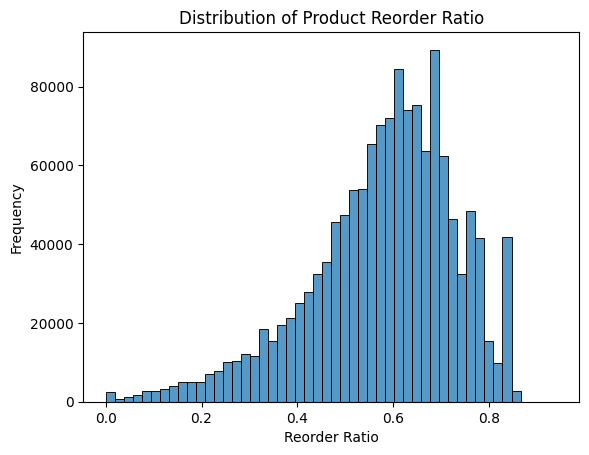

In [64]:
sns.histplot(train_df['product_reorder_ratio'], bins=50)
plt.title('Distribution of Product Reorder Ratio')
plt.xlabel('Reorder Ratio')
plt.ylabel('Frequency')
plt.show()

In [65]:
#Encoding categorical features into numerical values

label_cols = ['aisle', 'department']


df_encoded = train_df.copy()

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [66]:
y = df_encoded['reordered']

drop_cols = ['order_id', 'user_id', 'product_id', 'eval_set', 'reordered', 'aisle_id', 'department_id']
X = df_encoded.drop(columns=drop_cols)

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

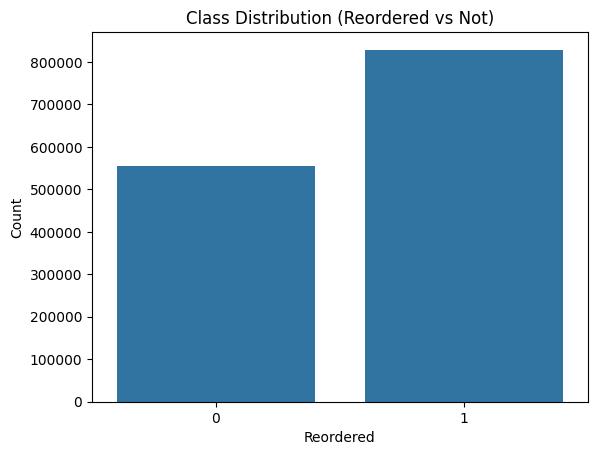

In [67]:
sns.countplot(x=y)
plt.title("Class Distribution (Reordered vs Not)")
plt.xlabel("Reordered")
plt.ylabel("Count")
plt.show()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
X_train.isnull().sum()

,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0
add_to_cart_order,0
user_total_orders,0
user_total_products,0
user_reorder_ratio,0
product_total_orders,0
product_reorder_ratio,0


In [70]:
X_test.isnull().sum()

,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0
add_to_cart_order,0
user_total_orders,0
user_total_products,0
user_reorder_ratio,0
product_total_orders,0
product_reorder_ratio,0


In [71]:
y_train.isnull().sum()

np.int64(0)

In [72]:
y_test.isnull().sum()

np.int64(0)

In [74]:
#Print shapes to confirm
print("Training features shape: " + str(X_train.shape))
print("Training labels shape: " + str(y_train.shape))
print("Testing features shape: " + str(X_test.shape))
print("Testing labels shape: "  + str(y_test.shape))

Training features shape: (1107693, 13)
Training labels shape: (1107693,)
Testing features shape: (276924, 13)
Testing labels shape: (276924,)


In [75]:
# Check class distribution
class_counts = y_train.value_counts()
print("Class distribution before balancing:")
print(class_counts)

Class distribution before balancing:
reordered
1    662730
0    444963
Name: count, dtype: int64


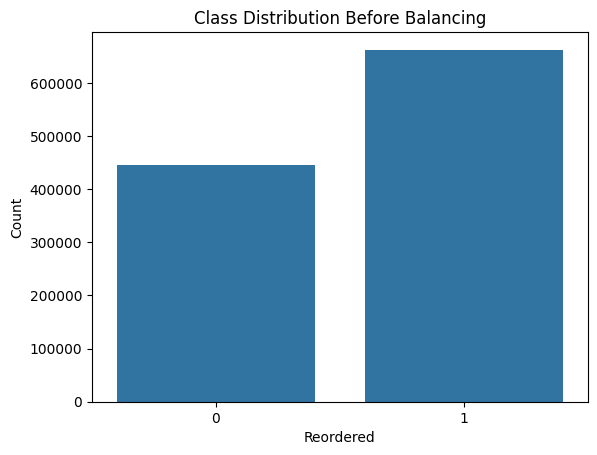

In [76]:
# Visualize
sns.countplot(x=y_train)
plt.title("Class Distribution Before Balancing")
plt.xlabel("Reordered")
plt.ylabel("Count")
plt.show()

In [78]:
#Combine X_train and y_train for easy manipulation
train_combined = pd.concat([X_train, y_train], axis=1)

#Separate majority and minority classes
majority_class = train_combined[train_combined['reordered'] == 0]
minority_class = train_combined[train_combined['reordered'] == 1]

#Over-sample minority class by duplicating until sizes match
minority_oversampled = minority_class.sample(n=len(majority_class), replace=True, random_state=42)

#Concatenate back to form balanced training data
train_balanced = pd.concat([majority_class, minority_oversampled], axis=0).sample(frac=1, random_state=42)

#Split back into features and labels
X_train_balanced = train_balanced.drop('reordered', axis=1)
y_train_balanced = train_balanced['reordered']

#Show new class distribution
print("Class distribution after balancing:\n" + str(y_train_balanced.value_counts()))

Class distribution after balancing:
reordered
1    444963
0    444963
Name: count, dtype: int64


In [79]:
X_train_balanced.isnull().sum()

,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0
add_to_cart_order,0
user_total_orders,0
user_total_products,0
user_reorder_ratio,0
product_total_orders,0
product_reorder_ratio,0


In [80]:
y_train_balanced.isnull().sum()

np.int64(0)

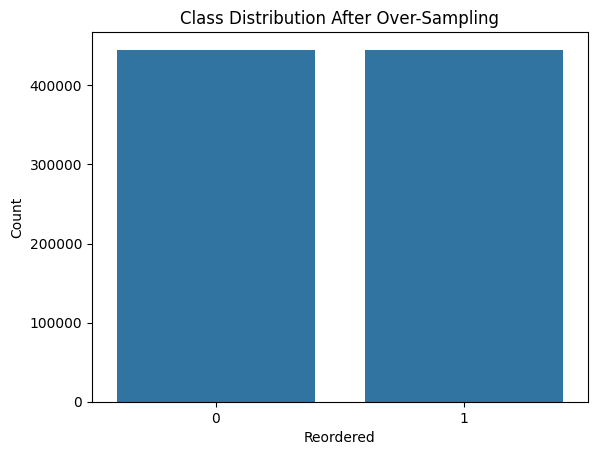

In [81]:
# Visualize new class distribution
sns.countplot(x=y_train_balanced)
plt.title("Class Distribution After Over-Sampling")
plt.xlabel("Reordered")
plt.ylabel("Count")
plt.show()

In [82]:
from sklearn.metrics import recall_score, roc_auc_score

In [83]:
# Dictionary to store model scores and compare which has the best performance

model_scores = {'Model': [],'Accuracy': [],'Precision': [],'Recall': [],'AUC-ROC': []}

In [84]:
# Logistic Regression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_balanced, y_train_balanced)
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]
model_scores['Model'].append('Logistic Regression')
model_scores['Accuracy'].append(accuracy_score(y_test, y_pred_lr))
model_scores['Precision'].append(precision_score(y_test, y_pred_lr))
model_scores['Recall'].append(recall_score(y_test, y_pred_lr))
model_scores['AUC-ROC'].append(roc_auc_score(y_test, y_proba_lr))

In [85]:
# K-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_balanced, y_train_balanced)
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:, 1]
model_scores['Model'].append('K-Nearest Neighbors')
model_scores['Accuracy'].append(accuracy_score(y_test, y_pred_knn))
model_scores['Precision'].append(precision_score(y_test, y_pred_knn))
model_scores['Recall'].append(recall_score(y_test, y_pred_knn))
model_scores['AUC-ROC'].append(roc_auc_score(y_test, y_proba_knn))

In [86]:
#Decision Tree

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_balanced, y_train_balanced)
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]
model_scores['Model'].append('Decision Tree')
model_scores['Accuracy'].append(accuracy_score(y_test, y_pred_dt))
model_scores['Precision'].append(precision_score(y_test, y_pred_dt))
model_scores['Recall'].append(recall_score(y_test, y_pred_dt))
model_scores['AUC-ROC'].append(roc_auc_score(y_test, y_proba_dt))

In [87]:
#Random Forest

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_balanced, y_train_balanced)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]
model_scores['Model'].append('Random Forest')
model_scores['Accuracy'].append(accuracy_score(y_test, y_pred_rf))
model_scores['Precision'].append(precision_score(y_test, y_pred_rf))
model_scores['Recall'].append(recall_score(y_test, y_pred_rf))
model_scores['AUC-ROC'].append(roc_auc_score(y_test, y_proba_rf))

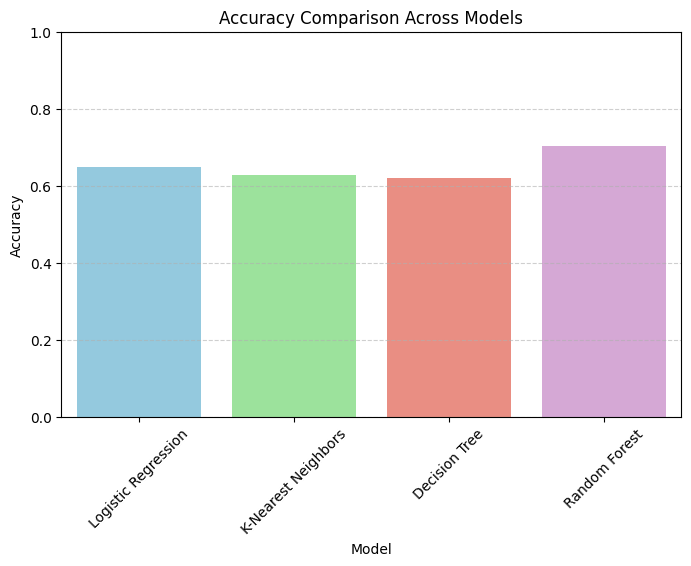

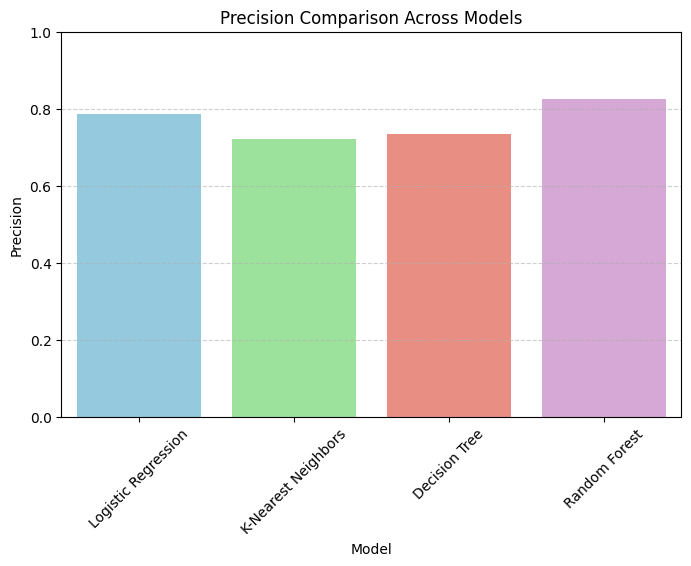

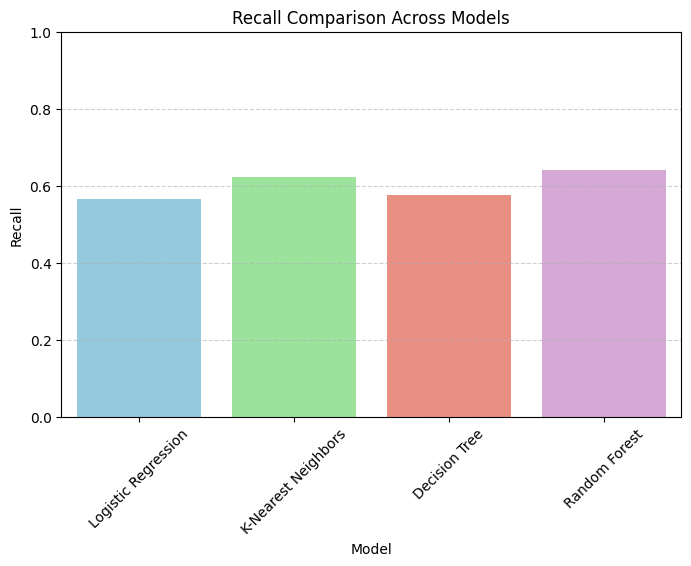

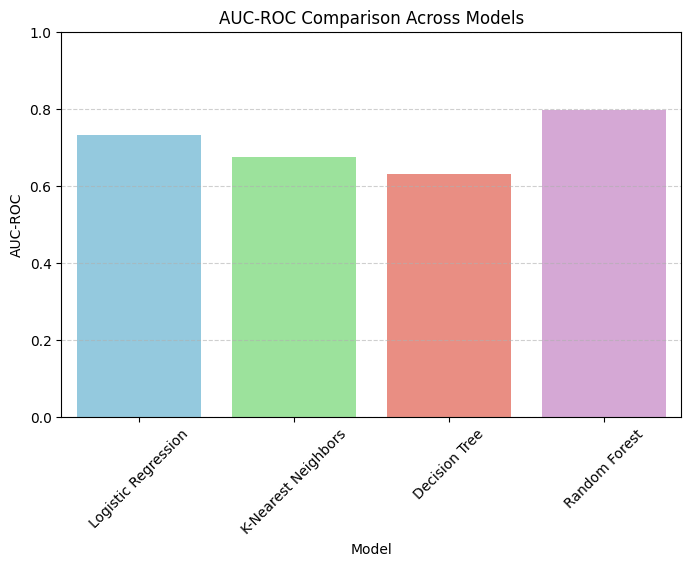

In [88]:
#Converting to DataFrame
scores_df = pd.DataFrame(model_scores)

#Defining model colors
model_color_map = {'Logistic Regression': 'skyblue','K-Nearest Neighbors': 'lightgreen','Decision Tree': 'salmon','Random Forest': 'plum'}

#Extracting color list in the order of models in DataFrame
model_colors = [model_color_map[model] for model in scores_df['Model']]

#Listing of metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'AUC-ROC']

#Creating one plot per metric
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Model', y=metric, data=scores_df, palette=model_colors)
    plt.title(metric + ' Comparison Across Models')
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
param_grid_knn = {'n_neighbors': [3, 5, 7, 9],'weights': ['uniform', 'distance'],'p': [1, 2] }

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [91]:
print("Best K-Nearest Neighbors Parameters:", grid_knn.best_params_)

Best K-Nearest Neighbors Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


In [92]:
# Optimised KNN
best_knn = grid_knn.best_estimator_
y_pred_knn_opt = best_knn.predict(X_test)
y_prob_knn_opt = best_knn.predict_proba(X_test)[:, 1]
model_scores['Model'].append('KNN Optimised')
model_scores['Accuracy'].append(accuracy_score(y_test, y_pred_knn_opt))
model_scores['Precision'].append(precision_score(y_test, y_pred_knn_opt))
model_scores['Recall'].append(recall_score(y_test, y_pred_knn_opt))
model_scores['AUC-ROC'].append(roc_auc_score(y_test, y_prob_knn_opt))

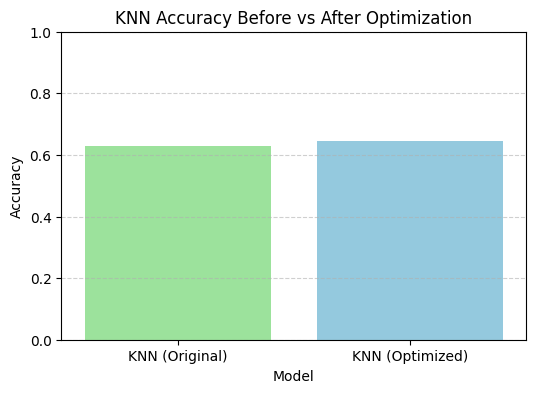

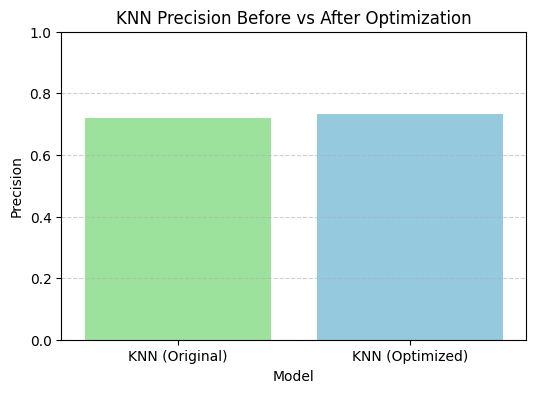

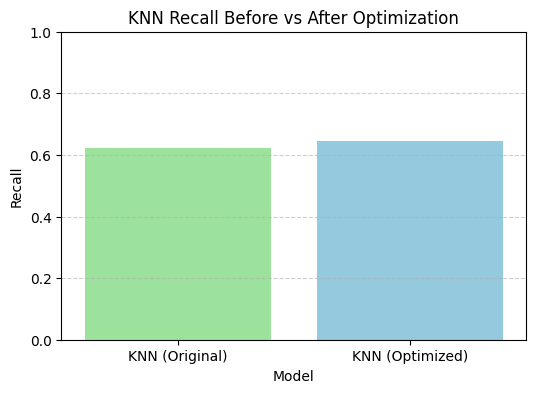

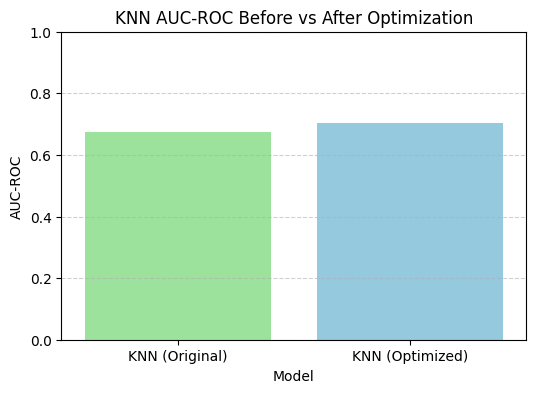

In [93]:
# Find index of original KNN model in model_scores
original_knn_index = model_scores['Model'].index('K-Nearest Neighbors')

# Define original scores
knn_original_scores = {'Model': 'KNN (Original)','Accuracy': model_scores['Accuracy'][original_knn_index],'Precision': model_scores['Precision'][original_knn_index],'Recall': model_scores['Recall'][original_knn_index],'AUC-ROC': model_scores['AUC-ROC'][original_knn_index]}

knn_optimized_scores = {'Model': 'KNN (Optimized)','Accuracy': accuracy_score(y_test, y_pred_knn_opt),'Precision': precision_score(y_test, y_pred_knn_opt),'Recall': recall_score(y_test, y_pred_knn_opt),'AUC-ROC': roc_auc_score(y_test, y_prob_knn_opt)}

knn_compare_df = pd.DataFrame([knn_original_scores, knn_optimized_scores])

# Define plot colors
colors = ['lightgreen', 'skyblue']

# Plot each metric comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'AUC-ROC']

for metric in metrics:
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Model', y=metric, data=knn_compare_df, palette=colors)
    plt.title(f'KNN {metric} Before vs After Optimization')
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()